# Horn Radio Telescope Spectra Plotting Usage Examples

### Glen Langston, 2021 October 26

This notebook shows examples of using previously averaged hot and cold load observations to study a single days observations. 

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [11]:
# Import the Radio Astronomy Service (RAS) code.
import ephem
import ras
import rasnames

In [12]:
# now create a Plot object
p = ras.Plot(doDebug=False)

In [13]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
obsdate = "21Oct10"
datadir = "/Volumes/2TB/archive3/pi16-data-" + obsdate
avedir = "./average/"
avehot = "./average/T16-21-09-28T155812.hot"
avecold = "./average/T16-21-09-28T185113.ast"
names = p.help("-R -C -I 3600. "+datadir)
# show the list of fine names found
p.hotFileName = avehot
p.coldFileName = avecold
print(names)

Flagging RFI
Spectral integration time for averaging: 3600.000000
['/Volumes/2TB/archive3/pi16-data-21Oct10']


In [14]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
files, count = rasnames.splitNames(names, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Frequency
Date: 2021-10-10
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
04:55:56 180.0, 60.0  109.7,-53.9    1.959    1.608    540000
05:58:50 180.0, 60.0  136.4,-53.9    1.959    1.610    540000
07:01:45 180.0, 60.0  159.3,-47.8    1.966    1.619    540000
08:04:40 180.0, 60.0  175.8,-37.9    1.969    1.624    540000
09:07:35 180.0, 60.0  187.5,-25.8    1.973    1.626    540000
10:10:30 180.0, 60.0  196.5,-12.7    1.982    1.640    540000
11:13:25 180.0, 60.0  204.0,  1.0    2.023    1.675    540000
12:16:20 180.0, 60.0  210.9, 15.0    2.073    1.706    540000
13:19:15 180.0, 60.0  218.3, 29.1    2.091    1.705    540000
14:22:09 180.0, 60.0  227.2, 42.9    2.060    1.683    540000
15:25:11 180.0, 60.0  240.3, 56.1    2.014    1.648    540000
16:28:06 180.0, 60.0  264.1, 67.1    1.978    1.621    540000
17:31:00 180.0, 60.0  307.6, 71.5    1.972    1.617    540000
18:33:55 180.0, 60.0  347.6, 65.3    1.901    1.563    540000
19:36:50 180.0, 6

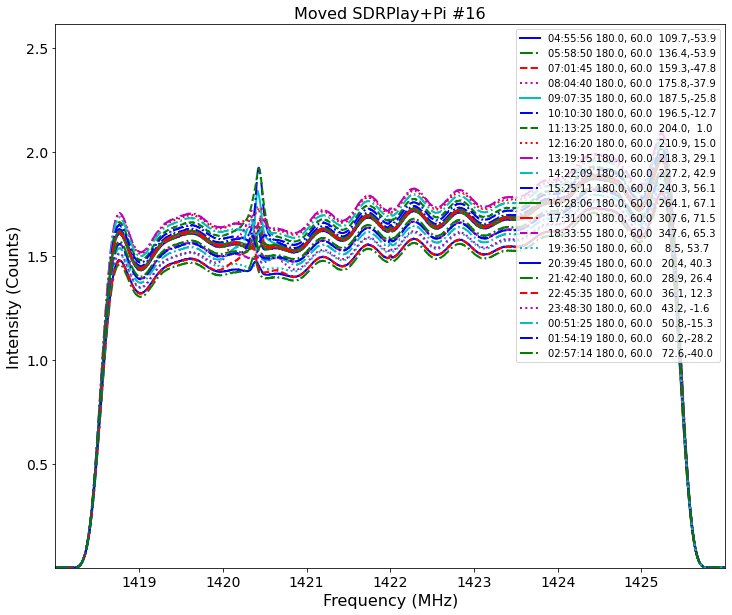

In [15]:
p.raw(files)

In [16]:
# start a new plot with different parameters
names = p.help("-V -BASE -C -R -I 3600 " + datadir)

Fitting and subtracking a baseline
Flagging RFI
Spectral integration time for averaging: 3600.000000


Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  172.79 +/-  0.15 ( 0.16  0.13) (K)
Ploting Intensity versus Velocity
Date: 2021-10-10
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
04:55:56 180.0, 60.0  109.7,-53.9    13.60     0.22    -9.747   540000
05:58:50 180.0, 60.0  136.4,-53.9    15.56     0.05    -3.969   540000
07:01:45 180.0, 60.0  159.3,-47.8    20.08     0.17     0.935   540000
08:04:40 180.0, 60.0  175.8,-37.9    26.44     0.06    15.955   540000
09:07:35 180.0, 60.0  187.5,-25.8    36.20     0.04    19.972   540000
10:10:30 180.0, 60.0  196.5,-12.7    49.09     0.07    21.631   540000
11:13:25 180.0, 60.0  204.0,  1.0    45.03     0.30    23.095   540000
12:16:20 180.0, 60.0  210.9, 15.0    16.74     0.24    20.896   540000
13:19:15 180.0, 60.0  218.3, 29.1     8.67     0.16    12.538   540000
14:22:09 180.0, 60.0  227.2, 42.9     6.96     0.04     5.573   540000
15:25:11 180.0, 60.0  240.3, 56.1     5.58     0

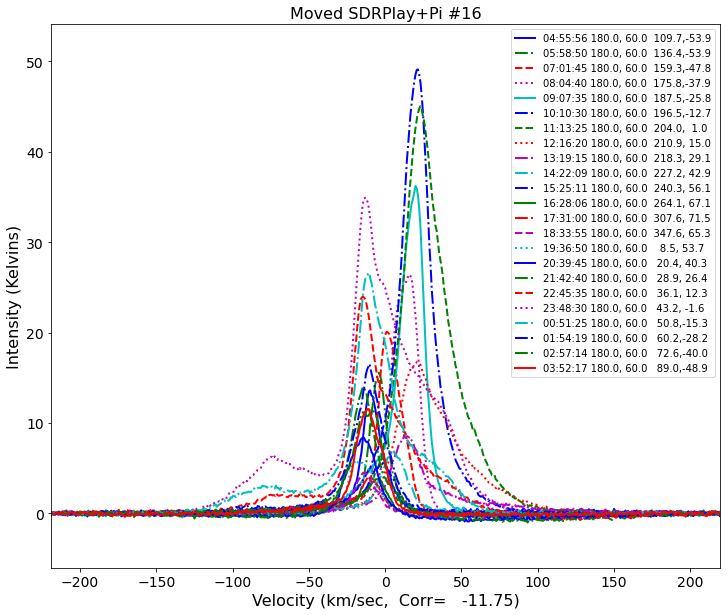

In [17]:
# now plot the average calibrated spectra for a few minutes of observations
p.tsys(names, doDebug=False)

In [18]:
keepdir = "./keep/"
!mkdir {keepdir}

mkdir: ./keep/: File exists


## Find and keep the average spectra

In [19]:
# create a new plot structure
# Select only the low galactic latitude data
names = p.help("-V -G 5 -BASE -C -R -I 3600 -O " + keepdir + " " + datadir)

Fitting and subtracking a baseline
Flagging RFI
Spectral integration time for averaging: 3600.000000
Writing average spectra to directory: ./keep/
Averaging obs. for Galactic Latitude range +/-      5.0


Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  172.79 +/-  0.15 ( 0.16  0.13) (K)
Ploting Intensity versus Velocity
Date: 2021-10-10
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
11:02:56 180.0, 60.0  203.5,  0.2    47.62     0.38    23.010   382500
Average: 532: 5.18    47.62  23.01 T0-21-10-10T103920.kel
23:35:23 180.0, 60.0   42.4,  0.2    34.99     0.26   -13.000   382500
Average: 533: 8.54    34.99  -13.00 T0-21-10-10T231148.kel
Date: 2021-10-11


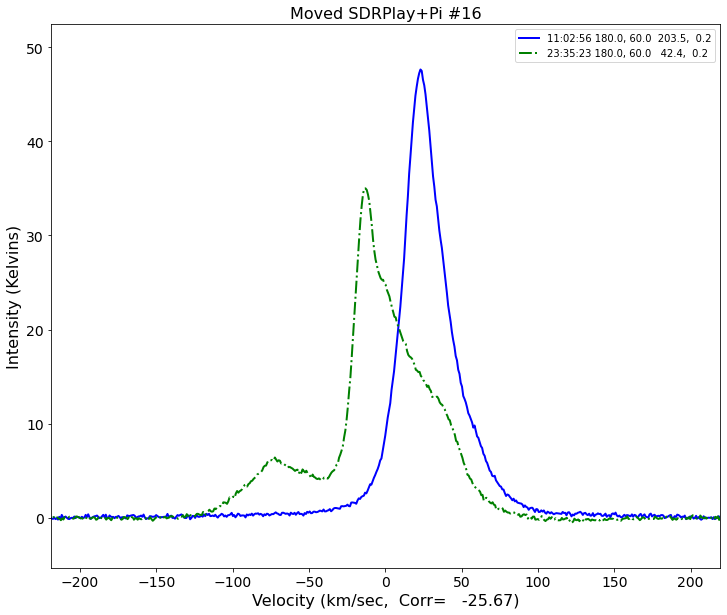

In [20]:
p.tsys(names, doDebug= False)

# Congratulations!
## You've searched an entier days observations for measurements at low galactic Latitude.
### You've used a previous day's calibration observations and found very strong hydrogen emission from two directions in the Galactic Plane